In [1]:
import yaml
with open('intents.yaml',encoding="utf8") as f:
    intention =yaml.load(f,Loader=yaml.FullLoader)

In [2]:
intention

{'intents': [{'tag': 'google',
   'patterns': ['google',
    'arama',
    'internet',
    'internette arama yapalım',
    "google'da arama yapalım"],
   'responses': ['Google'],
   'context': ['']},
  {'tag': 'greeting',
   'patterns': ['selam',
    'orda mısın',
    'hey',
    'hola',
    'hello',
    'iyi günler',
    'namaste',
    'yo',
    'aleykum selam',
    'selamun aleykum',
    'merhabalar',
    'merhaba',
    'selamlar'],
   'responses': ['Merhaba',
    'Sizi görmek ne güzel',
    'Sizi yeniden gördüğüm için mutluyum',
    'Merhaba, size, nasıl yardımcı olabilirim'],
   'context': ['']},
  {'tag': 'goodbye',
   'patterns': ['bye',
    'görüşmek üzere',
    'goodbye',
    'görüşürüz',
    'kendine iyi bak',
    'güle güle',
    'çıkış',
    'programı kapat',
    'kapat'],
   'responses': ['Görüşürüz. İyi günler dilerim.',
    'Sağlıklı günler dilerim. Tekrar görüşmek üzere',
    'Güle güle. Yine beklerim.'],
   'context': ['']},
  {'tag': 'thanks',
   'patterns': ['rica ederi

In [3]:
len(intention['intents'])

39

In [4]:
sayi=[]
for x in intention['intents']:
    sayi.append(len(x['patterns']))
sum(sayi)

443

In [5]:
sayi=[]
for x in intention['intents']:
    for i in x['patterns']:
        for y in i.split():
            sayi.append(y)
        
len(list(sayi))

1573

In [6]:
sayi=[]
for x in intention['intents']:
    for i in x['patterns']:
        for y in i.split():
            sayi.append(y)
        
len(list(set(sayi)))

306

In [ ]:
#Gen AI

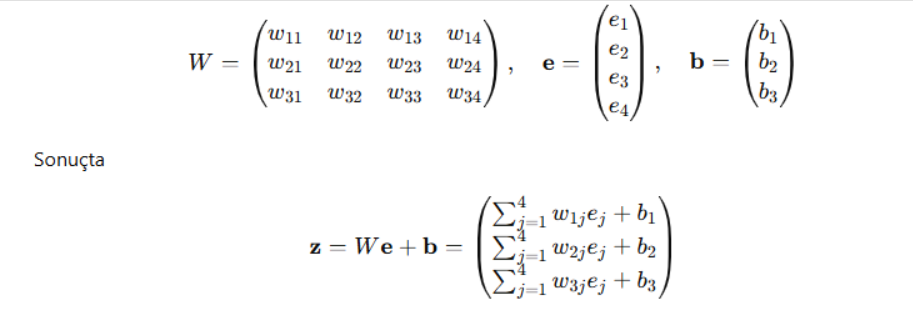

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
import warnings
warnings.filterwarnings('ignore')

mesaj1 = 'write a python program to add two numbers \n'
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model     = AutoModel.from_pretrained("bert-base-uncased")

# 1) Tokenize et ve tensöre dönüştür
inputs = tokenizer(mesaj1, return_tensors="pt")
# inputs['input_ids'] = tensor([[ 2261, 1037, 18748, ... ]])

# 2) Modelin son gizli katman çıktısını al
outputs = model(**inputs)
# outputs.last_hidden_state shape = (1, seq_len, hidden_size)

# 3) Batch boyutunu kaldır, geriye (seq_len, hidden_size) boyutlu tensor kalır
token_embeddings: torch.FloatTensor = outputs.last_hidden_state.squeeze(0)
# şimdi token_embeddings.shape örn. → torch.Size([10, 768])

# 4) Listeye çevirirsek:
embeddings_list = token_embeddings.tolist()
# embeddings_list uzunluğu = seq_len (10)
#her eleman da 768 float’tan oluşan bir liste
print("Num tokens:", len(embeddings_list))
print("Embedding dim:", len(embeddings_list[0]))

Num tokens: 10
Embedding dim: 768


In [2]:
from sentence_transformers import SentenceTransformer
import os
from sentence_transformers import util
import torch
model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
model = SentenceTransformer(model_name, device='cpu')
PWD = os.getcwd()
model.save(os.path.join(PWD, model_name))

In [3]:
PWD = os.getcwd()
model_name_karislastirma = 'paraphrase-multilingual-MiniLM-L12-v2'
karislastirma_model = SentenceTransformer(os.path.join(PWD, model_name_karislastirma),device='cpu')

In [4]:
mesaj1

'write a python program to add two numbers \n'

In [5]:
corpus_embedding = karislastirma_model.encode(mesaj1,
                                              convert_to_tensor=True,
                                              normalize_embeddings=True)
corpus_embedding

tensor([-5.5685e-02,  5.5428e-02, -5.8417e-02,  4.1950e-05, -8.2145e-02,
         3.5424e-02,  1.4260e-02,  1.8136e-02,  2.7889e-02,  2.7640e-02,
        -2.3090e-02, -1.6424e-02,  5.4054e-03,  3.6531e-02, -2.0716e-02,
        -1.1984e-01, -4.3512e-02,  2.4010e-02, -1.9365e-02, -1.7657e-02,
         7.9098e-02,  1.2157e-02, -2.0643e-02, -1.6875e-02,  3.5055e-02,
        -4.0235e-03, -8.7139e-02,  2.9867e-02,  3.3016e-02,  4.0341e-03,
         4.2073e-02,  1.1854e-01,  6.1945e-02, -1.7394e-02, -1.2458e-02,
         5.8233e-02,  3.2209e-03,  6.7773e-02, -6.4787e-02,  4.5586e-02,
         1.3680e-02,  1.1225e-02,  7.1556e-02, -5.1077e-02, -3.0187e-02,
        -5.9518e-02, -3.7222e-02,  7.1936e-02,  9.1197e-02, -9.7533e-03,
        -1.5871e-02,  2.9770e-02, -9.9600e-02, -9.2042e-02, -3.4746e-03,
        -4.3501e-02,  9.2685e-03,  8.1328e-02, -5.7899e-02,  3.6679e-02,
        -5.2796e-02, -2.8739e-02,  4.2910e-02,  2.4774e-02,  4.2168e-02,
         8.8637e-03, -9.4600e-02,  4.1893e-02,  2.5

In [6]:
len(corpus_embedding)

384

In [ ]:
#384 weight
#384 feature
#1 bias